In [ ]:
import pandas as pd #importando o pandas para a manipulação e análise dos dados
import yfinance as yf #api do yahoo finance
import matplotlib.pyplot as plt #biblio dos graficos
from prophet import Prophet #utilizei essa biblio para analizar os intervalos de tempo dos dados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np #normalizar os dados por conta de um erro de valor

#Baixando os dados do yahoo finance

In [ ]:
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099136,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592880,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432419,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216782,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198944,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


#Dividindo os dados em conjuntos de treinamento e teste

In [ ]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

# Usar o Prophet para prever os preços de fechamento

In [ ]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}) #renomeando as colunas da tabela de dados
modelo_prophet = Prophet(weekly_seasonality=True,
                         yearly_seasonality=True,  #definindo a sazonalidade
                         daily_seasonality=False)
modelo_prophet.add_country_holidays(country_name='US')
modelo_prophet.fit(dados_prophet_treino)
futuro_prophet = modelo_prophet.make_future_dataframe(periods=150)
previsao_prophet = modelo_prophet.predict(futuro_prophet)
previsao_prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0r4ewvrb/w2l76t9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0r4ewvrb/pd3o_a67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29845', 'data', 'file=/tmp/tmp0r4ewvrb/w2l76t9g.json', 'init=/tmp/tmp0r4ewvrb/pd3o_a67.json', 'output', 'file=/tmp/tmp0r4ewvrb/prophet_modelwlj40tux/prophet_model-20240405233524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:35:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:35:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.122755,145.269018,155.905570,146.122755,146.122755,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.129962,4.129962,4.129962,0.0,0.0,0.0,150.507194
1,2020-01-03,146.098731,145.002282,155.696260,146.098731,146.098731,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,3.930311,3.930311,3.930311,0.0,0.0,0.0,150.422588
2,2020-01-06,146.026658,143.834537,154.741310,146.026658,146.026658,0.0,0.0,0.0,0.0,...,-0.010894,-0.010894,-0.010894,3.290189,3.290189,3.290189,0.0,0.0,0.0,149.305952
3,2020-01-07,146.002633,144.154108,154.981695,146.002633,146.002633,0.0,0.0,0.0,0.0,...,0.158517,0.158517,0.158517,3.077639,3.077639,3.077639,0.0,0.0,0.0,149.238789
4,2020-01-08,145.978609,144.266806,154.184867,145.978609,145.978609,0.0,0.0,0.0,0.0,...,0.303936,0.303936,0.303936,2.872514,2.872514,2.872514,0.0,0.0,0.0,149.155059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.716419,144.177920,164.890149,140.569122,158.759954,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.602463,4.602463,4.602463,0.0,0.0,0.0,154.573358
1045,2023-12-22,149.663754,144.249138,164.985599,140.387252,158.739609,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,4.732636,4.732636,4.732636,0.0,0.0,0.0,154.789936
1046,2023-12-23,149.611089,143.737490,164.258076,140.232646,158.761667,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.832364,4.832364,4.832364,0.0,0.0,0.0,153.893662
1047,2023-12-24,149.558424,142.999233,164.188072,140.078041,158.739691,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.900118,4.900118,4.900118,0.0,0.0,0.0,153.908751


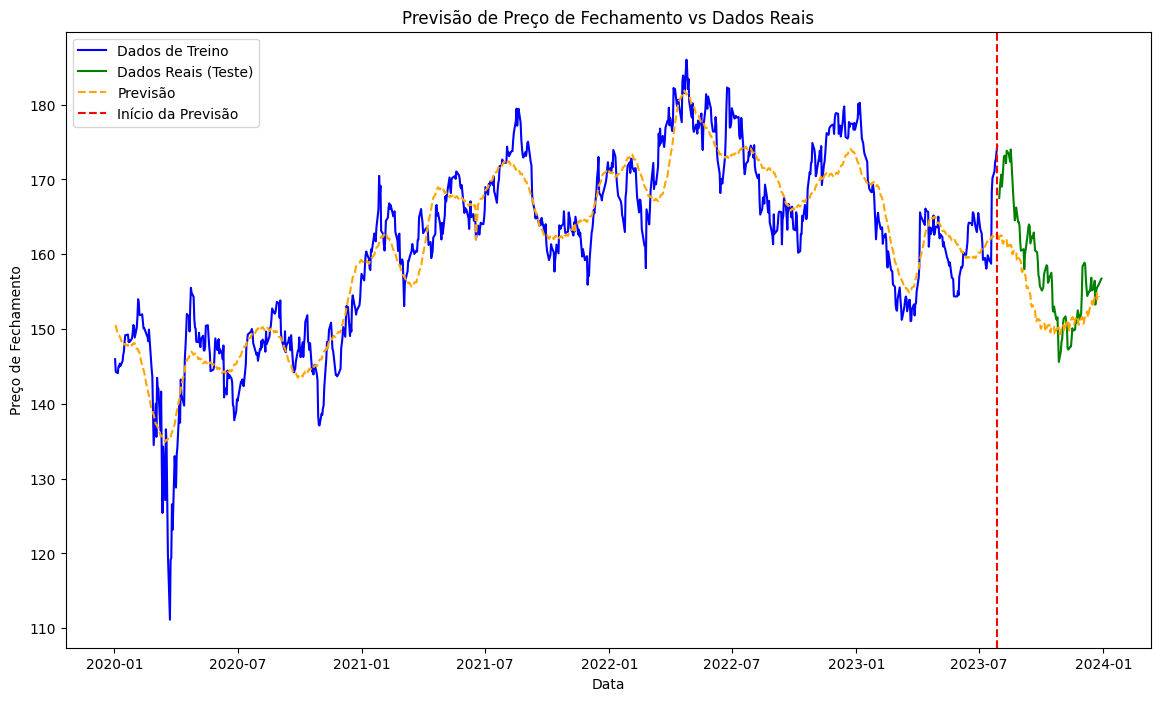

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao_prophet['ds'], previsao_prophet['yhat'], label='Previsão', color='orange', linestyle='--')
plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

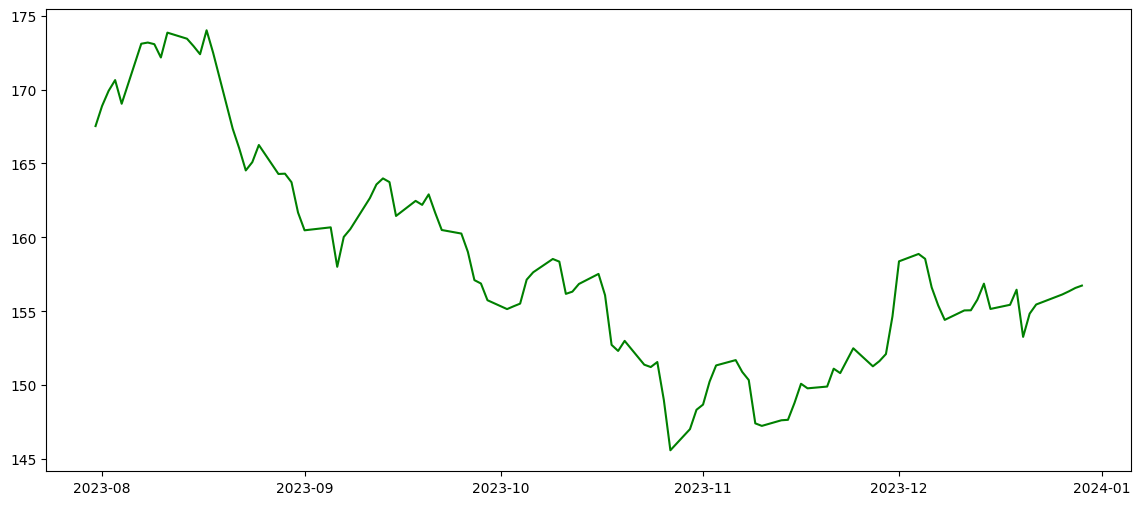

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais', color='green')
